# Forestline

Forestline is nothing more than a one-dimensional random forest. This random forest can be used to plot a trend line, i.e. one can visualize a one-dimensional random forest. 

The curve identifies the structure of the data or the real trend because it doesn't have a predefined parametric shape yet is able to reduce variance through bagging -- such as random forests do. 

### Bagging to Reduce Variance 

A regression tree has a low bias but high variance. Especially when fitted to data with a lot of noise, a tree only 3 or 4 levels deep can over-fit and produce implausible results.
We can retain the low bias of the regression tree model but significantly reduce the variance by bagging. 
Bagging and boosting are among the most powerful and popular techniques in data science. Models such as XGBoost, AdaBoost, and random forest are based on these techniques. 

Random subsamples of the same sample are technically not independent - observations can be drawn for several subsamples. If the sample contains $k$ observations, each observation has a probability of $(1-1/k)^k$ of not being drawn - $(1-1/k)^k \longrightarrow 1/e$. Hence, each observation will be drawn at least once with a probability of about 63%. Bootstrapping only *simulates* having $n$ independent subsample, but is considered a very effective simulation in practice. 
Empirically, the bagged model often performs similarly to what we’d get from training on independent samples.
Suppose $\forall i \neq j$, $Corr(Z_i,Z_j) = \rho$ (average over Pearson correlation coefficients). Then
$\mathbb{V}(\frac{1}{n}\sum_{i\leq n} Z_i)=\rho \sigma^2 + \frac{(1-\rho)}{n} \sigma^2$

### Interpretable Machine Learning

Models such as random forests are considered **black box** - to be conservative. They can be explained using measures of variable importance and Shapley values can be estimated very efficiently for random forests. But they are not as intuitively explainable as a regression model and it is also not easy to make expert adjustments. These are important properties for regulatory models.

The bagging and boosting methods can be used to produce interpretable models if we apply the bagging procedure to each variable individually - univariate models. Here we apply bagging to the centralization quota only. If a variable is bagged individually, the resulting model is summarized in the form of a curve.
We display $Z[x_j, x_{j+1}]= 1/n \sum_{i\leq n} Z_i [x_j, x_{j+1}]$ for each incremental interval of the x-axis.

Each bagged variable $x_l^b$ can be used to build a generalized additive model (GAM) of the form:
$g(\mathbb{E}(y))=\beta + f_1(x_1^b) + ... + f_m(x_m^b).$
This is an interpretable model which incorporates powerful ensemble methodology. Implausibilities such as jumps and discontinuities can qualitatively be adjusted in the curve with appropriate argumentation.

In [7]:
from forestline import get_forest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("simulated_data.csv")

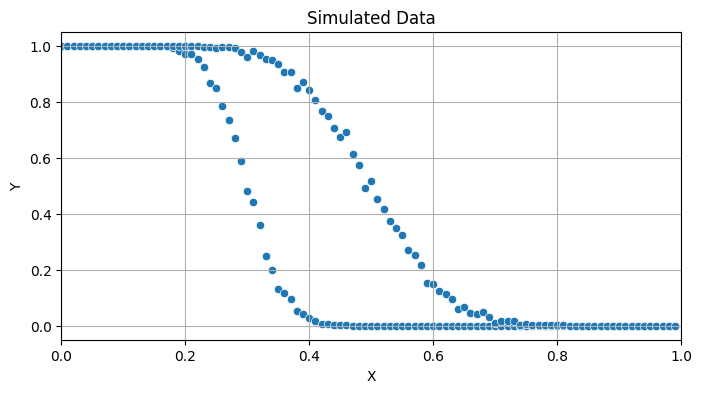

In [17]:
FS = (8, 4)  # figure size
r = np.linspace(0, 1, 200)
_, ax = plt.subplots(figsize=FS)

sns.scatterplot(data=df, x="p", y="d")

ax.grid()
_ = ax.set(xlabel="X", ylabel="Y", title="Simulated Data")
_ = ax.set_xlim(0, 1)

In [14]:
df_forest = get_forest(df=df, predict_var="p", response_var="d", trees=5000, 
                       grid_min=0, grid_max=1, grid=0.001, sample_prop=0.5, 
                       depth=3, replace=False)

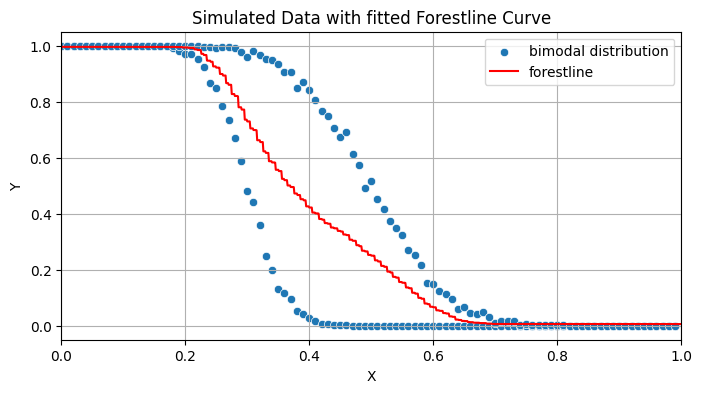

In [19]:
FS = (8, 4)  # figure size
r = np.linspace(0, 1, 200)
_, ax = plt.subplots(figsize=FS)

sns.scatterplot(data=df, x="p", y="d", label = "bimodal distribution")
plt.plot(df_forest['p'], df_forest['d_mean'], 'r-', label = "forestline")
ax.legend()

ax.grid()
_ = ax.set(xlabel="X", ylabel="Y", title="Simulated Data with fitted Forestline Curve")
_ = ax.set_xlim(0, 1)